In [1]:
import os
import numpy as np

# defining global variable path
image_path = "./images_training_rev1/new_images/"

#function to load folder into arrays and then it returns that same array'''
def loadImages(path):
    # Put files into lists and return them as one list of size 4
    image_files = sorted([os.path.join(path, file)
         for file in os.listdir(path) if file.endswith('.jpg')])
 
    return image_files

In [2]:
data_img = loadImages(image_path)

In [3]:
import cv2
img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in data_img]
print(img[0].shape)

(64, 64, 3)


In [4]:
img = np.asarray(img)

In [5]:
import pandas as pd
data = pd.read_csv('class1_df.csv', index_col=0)

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(img, data, test_size=.2, random_state=15)
print(X_train.shape)
print(y_train.shape)

(49262, 64, 64, 3)
(49262, 3)


In [8]:
# ignore Warning
import warnings
warnings.filterwarnings("ignore")

from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization, GlobalMaxPooling2D, Conv2D, MaxPooling2D
import tensorflow as tf

callbacks = [EarlyStopping(monitor='val_acc', patience=10)]

seed = 7
np.random.seed(seed)
tf.set_random_seed(seed)
#tf.random.set_seed(seed)

model = Sequential()
model.add(Conv2D(filters=8, kernel_size=(3,3),input_shape=(64,64,3),kernel_initializer='normal', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=8, kernel_size=(3,3),kernel_initializer='normal',activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(3, kernel_initializer='normal', activation='softmax'))

Using TensorFlow backend.


In [10]:
import keras
model.compile(
  loss='categorical_crossentropy',
  optimizer=keras.optimizers.RMSprop(lr=0.001, rho=0.9),
  metrics=['accuracy'],
)

In [11]:
# ignore Warning
import warnings
warnings.filterwarnings("ignore")

history = model.fit(
  X_train,
  y_train,
  epochs=100,
  validation_data=(X_val, y_val),
  batch_size=X_train.shape[1], 
  callbacks=callbacks
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 49262 samples, validate on 12316 samples
Epoch 1/100





49262/49262 [==============================] - 79s 2ms/step - loss: 0.7389 - acc: 0.7495 - val_loss: 0.7006 - val_acc: 0.7861
Epoch 2/100
49262/49262 [==============================] - 80s 2ms/step - loss: 0.6907 - acc: 0.7925 - val_loss: 0.6856 - val_acc: 0.7938
Epoch 3/100
49262/49262 [==============================] - 79s 2ms/step - loss: 0.6825 - acc: 0.8044 - val_loss: 0.6739 - val_acc: 0.8121
Epoch 4/100
49262/49262 [==============================] - 79s 2ms/step - loss: 0.6787 - acc: 0.8074 - val_loss: 0.6773 - val_acc: 0.8113
Epoch 5/100
49262/49262 [==============================] - 79s 2ms/step - loss: 0.6759 - acc: 0.8134 - val_loss: 0.6798 - val_acc: 0.8054
Epoch 6/100
49262/49262 [==============================] - 77s 2ms/step - loss: 0.6745 - acc: 0.8131 - val_loss: 0.6704 - val_acc: 0.8197
Epoch 7/100
49262/49

In [12]:
import tensorflow as tf
tf.__version__

'1.15.0'

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 8)         584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 4707      
Total params: 5,515
Trainable params: 5,515
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Predict.
predictions = model.predict(X_val)
# Print our model's predictions.
print("predictions: " + str(predictions[:1]))

# Check our predictions against the ground truths.
print(y_val[:1]) 

predictions: [[0.17886199 0.8167672  0.00437087]]
          Class1.1  Class1.2  Class1.3
GalaxyID                              
853598    0.113049  0.886951       0.0


In [15]:
score = model.evaluate(X_val, y_val, verbose=0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.6751280101563645
Val accuracy: 0.8089477102374751


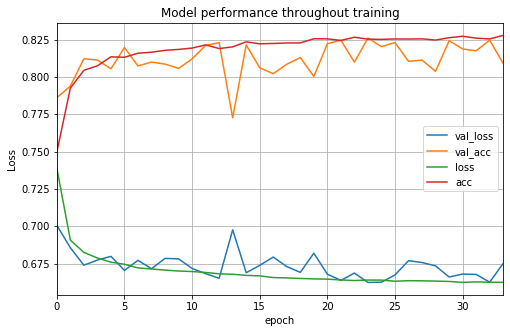

In [17]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title('Model performance throughout training')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

## Score

Avec ce modèle:  
model = Sequential()
model.add(Conv2D(filters=8, kernel_size=(3,3),input_shape=(64,64,3),kernel_initializer='normal', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=8, kernel_size=(3,3),kernel_initializer='normal',activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(3, kernel_initializer='normal', activation='softmax'))

model.compile(
  loss='categorical_crossentropy',
  optimizer=keras.optimizers.RMSprop(lr=0.001, rho=0.9),
  metrics=['accuracy'],
)

history = model.fit(
  X_train,
  y_train,
  epochs=100,
  validation_data=(X_val, y_val),
  batch_size=X_train.shape[1], 
)

Accuracy = 80,8 %  
Prediction/correct value: predictions: predictions: [[0.17886199 0.8167672  0.00437087]]/correct_value[[0.113049  0.886951       0.0]]